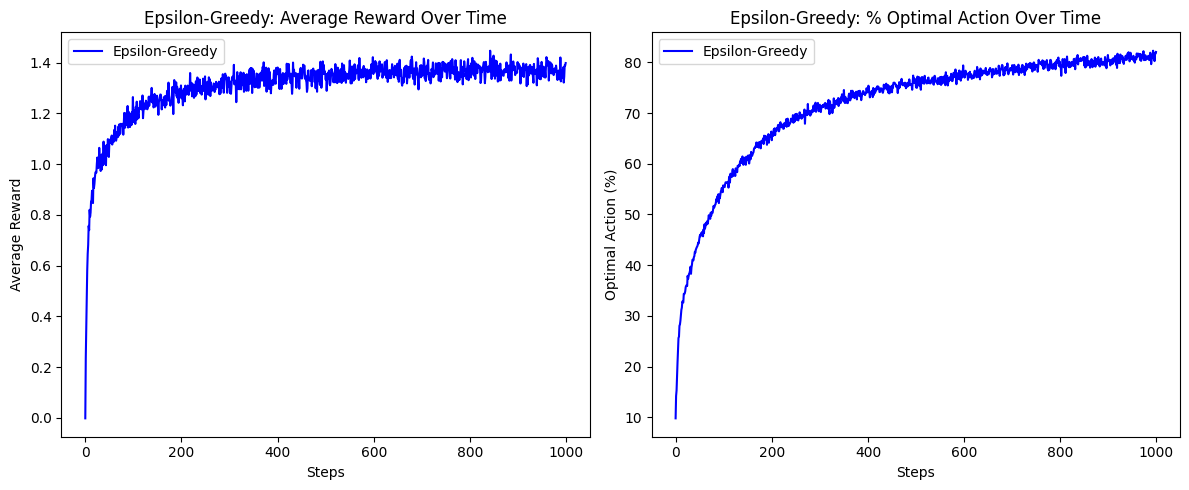

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy(k=10, epsilon=0.1, steps=1000, runs=2000):
    rewards = np.zeros((runs, steps))
    optimal_action_counts = np.zeros((runs, steps))

    for run in range(runs):
        q_true = np.random.randn(k)  # true action values
        q_est = np.zeros(k)          # estimated action values
        action_count = np.zeros(k)

        optimal_action = np.argmax(q_true)

        for t in range(steps):
            if np.random.rand() < epsilon:
                action = np.random.randint(k)
            else:
                action = np.argmax(q_est)

            reward = np.random.randn() + q_true[action]
            action_count[action] += 1
            q_est[action] += (reward - q_est[action]) / action_count[action]

            rewards[run, t] = reward
            if action == optimal_action:
                optimal_action_counts[run, t] = 1

    avg_rewards = rewards.mean(axis=0)
    optimal_action_perc = optimal_action_counts.mean(axis=0) * 100

    return avg_rewards, optimal_action_perc

# 執行並畫圖
avg_rewards, optimal_action_perc = epsilon_greedy(epsilon=0.1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(avg_rewards, label="Epsilon-Greedy", color='blue')
plt.title("Epsilon-Greedy: Average Reward Over Time")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()

plt.subplot(1,2,2)
plt.plot(optimal_action_perc, label="Epsilon-Greedy", color='blue')
plt.title("Epsilon-Greedy: % Optimal Action Over Time")
plt.xlabel("Steps")
plt.ylabel("Optimal Action (%)")
plt.legend()

plt.tight_layout()
plt.show()